In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### EDA

In [3]:
df.median_house_value

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

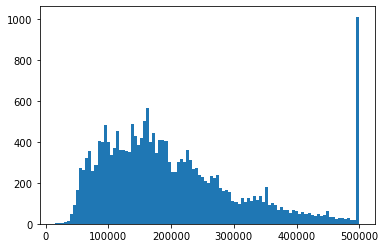

In [4]:
plt.hist(df.median_house_value, bins = 100)
plt.show()

In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

### Question 1
Find a feature with missing values. How many missing values does it have?

In [7]:
df[features].isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

total_bedroom has 207 missing values

### Question 2
What's the median (50% percentile) for variable 'population'?

In [8]:
df[features].population.describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

Answer: 1166

In [9]:
n = len(df[features])

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [10]:
df_train = df[features].iloc[n_train:]
df_val = df[features].iloc[n_train:n_train+n_val]
df_test = df[features].iloc[n_train + n_val:]


In [11]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df[features].iloc[idx[:n_train]]
df_val = df[features].iloc[idx[n_train:n_train+n_val]]
df_test = df[features].iloc[idx[n_train + n_val:]]

In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [14]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [15]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250
...,...,...,...,...,...,...,...,...
12379,-117.81,33.88,19.0,2265.0,283.0,904.0,279.0,9.2327
12380,-120.68,35.48,15.0,2608.0,525.0,1351.0,502.0,2.7798
12381,-120.91,38.98,13.0,7689.0,1415.0,3264.0,1198.0,3.6530
12382,-117.72,34.09,36.0,1473.0,328.0,785.0,299.0,3.2566


In [16]:
df_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [17]:
df_val.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [18]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

# filling missing value with 0

In [47]:
df_train_zero = df_train.copy()
df_train_zero = df_train_zero.fillna(0)
df_train_zero.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [22]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

##### training the model

In [48]:
1

###### evealuating the model

In [25]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error **2
    mse = se.mean()
    return np.sqrt(mse)

In [26]:
rmse(y_train, y_pred).round(2)

0.34

###### testing on the validation data

In [27]:
y_pred_val = w0 + df_val.dot(w)
rmse(y_val, y_pred_val).round(2)

0.33

# Filling the missing value with the mean

In [28]:
df_train_mean = df_train.copy()
df_train_mean = df_train.fillna(df_train.total_bedrooms.mean())

In [29]:
w0, w = train_linear_regression(df_train_mean, y_train)

In [30]:
y_pred_mean = w0 + df_train_mean.dot(w)

In [31]:
rmse(y_train, y_pred_mean).round(2)

0.34

In [32]:
y_pred_val = w0 + df_val.dot(w)
rmse(y_val, y_pred_val).round(2)

0.33

Both are equally good.

# Question 4

In [33]:
df_train = df_train.fillna(0)

In [34]:
def train_linear_regression_reg(X,y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [35]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(df_train, y_train, r=r)

    #X_val = prepare_X(df_val)
    y_pred_val = w0 + df_val.dot(w)
    score = rmse(y_val, y_pred_val)
    
    print(r, w0, score.round(2))

0 -11.686975241970226 0.33
1e-06 -11.686959175950335 0.33
0.0001 -11.68536886556655 0.33
0.001 -11.670931318286257 0.33
0.01 -11.528493586076086 0.33
0.1 -10.274500282121712 0.33
1 -4.920480897796898 0.33
5 -1.482095745685135 0.34
10 -0.7899311832050503 0.34


# Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))

In [36]:
n = len(df[features])

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [37]:
df_train = df[features].iloc[n_train:]
df_val = df[features].iloc[n_train:n_train+n_val]
df_test = df[features].iloc[n_train + n_val:]


In [38]:
rmse_list = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


for seed in seeds:
    #shuffling the data
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df[features] = df[features].iloc[idx]
    
    #subsetting and reshuffling
    df_train = df[features].iloc[idx[:n_train]]
    df_val = df[features].iloc[idx[n_train:n_train+n_val]]
    df_test = df[features].iloc[idx[n_train + n_val:]]
    
    #resetting index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    #setting the output variable
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    #deleting the target variable
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    
    #fill na with 0
    X_train = df_train.fillna(0).values
    
    #training the dataset 
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_train.dot(w)
    
    X_val = df_val.fillna(0).values
    y_pred2 = w0 + X_val.dot(w)
    
    
    def rmse(y, y_pred):
        error = y - y_pred
        se = error **2
        mse = se.mean()
        return np.sqrt(mse)
    
    rmse_val = (rmse(y_val, y_pred2))
    #print(rmse_val)
    rmse_list.append(rmse_val)
    
    print(seed, w0, rmse_val)
    
    
    


0 -11.900382138067279 0.3388430480528525
1 -11.732757373265155 0.3362387255956549
2 -11.806729361023445 0.33209123188361384
3 -11.587900347934326 0.34051536090356666
4 -11.389470588610251 0.33890240665720145
5 -11.447114275982313 0.343486672571834
6 -11.370516352090455 0.34519809530983075
7 -12.473448918095002 0.33959899274062727
8 -11.800287429474718 0.346623087318039
9 -11.459046830677947 0.3365926124173199


In [39]:
print(np.std(rmse_list).round(3))

0.004


# Question 6

Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

In [40]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
df_full_train = df_full_train.fillna(0).values

In [41]:
y_full_train = np.concatenate([y_train, y_val])


In [42]:
w0, w = train_linear_regression_reg(df_full_train, y_full_train, r=0.001)

In [43]:
df_test = df_test.fillna(0)

In [44]:
df_test.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [46]:
y_pred_test = w0 + df_test.dot(w)
score = rmse(y_test, y_pred_test)
score

0.3453168914376374